In [2]:
global ROOT_DIR
ROOT_DIR = '/gpfs/commons/groups/gursoy_lab/aelhussein/ot_cost/otcost_fl_rebase'
global DATA_DIR
DATA_DIR = f'{ROOT_DIR}/data/ISIC'

In [181]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
import json
sys.path.append(f'{ROOT_DIR}/code/helper/')
import OTCost as ot
import importlib
importlib.reload(ot)
import torch
sys.path.append(f'{ROOT_DIR}/code/ISIC/')
#import embedding as embed
import importlib
#importlib.reload(embed)
import torch.nn.functional as F
import torch.nn as nn
import dataset
sys.path.append(f'{ROOT_DIR}/code/ISIC/efficientnet_ae')
import model_ae as ae
import utils_ae
importlib.reload(dataset)
importlib.reload(ae)
from torch.utils.data import DataLoader as dl

In [138]:
BATCH_SIZE = 16

## Visualise data

(1024, 1024, 3)

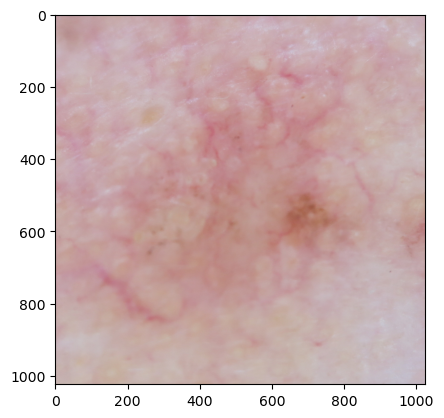

In [146]:
center0 = dataset.FedIsic2019(center=0, train=True, data_path=DATA_DIR)
data_0 = dl(center0, batch_size=1, shuffle=True)
X, y = next(iter(data_0))
image = np.array(X[0,:,:,:]).transpose(1,2,0)
image_np = (image).astype('uint8')
plt.imshow(image_np)

## Load data from each site

In [296]:
importlib.reload(ae)
importlib.reload(utils_ae)
data = dataset.FedIsic2019(train=True, pooled = True, data_path=DATA_DIR)
data_loader = dl(data, batch_size = BATCH_SIZE, shuffle = True)
model = ae.EfficientNetAutoEncoder.from_pretrained('efficientnet-b0')
criterion = nn.MSELoss()

Loaded pretrained weights for efficientnet-b0


In [299]:
model.eval()
prediction = model(X)